<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/ML_MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Midterm Simón Jaramillo y Simón Gómez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_theme(style="ticks", color_codes=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
#Configurar los gráficos
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')


# Regresión Lineal


En este problema, se obtendrá una ecuación de regresión que simule o prediga la temperatura según ciertas características naturales y ambientales.

In [2]:
df = pd.read_csv("Temperature.csv")

In [3]:
df.describe()
#Como se puede observar, todos los datos están completos.

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [4]:
df = df.drop(columns = ["Date Time", "Tdew (degC)","T (degC)","sh (g/kg)" ])

In [5]:
df.head()

,p (mbar),Tpot (K),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,265.40,93.3,3.33,3.11,0.22,3.12,1307.75,1.03,1.75,152.3
1,996.57,265.01,93.4,3.23,3.02,0.21,3.03,1309.80,0.72,1.50,136.1
2,996.53,264.91,93.9,3.21,3.01,0.20,3.02,1310.24,0.19,0.63,171.6
3,996.51,265.12,94.2,3.26,3.07,0.19,3.08,1309.19,0.34,0.50,198.0
4,996.51,265.15,94.1,3.27,3.08,0.19,3.09,1309.00,0.32,0.63,214.3


In [6]:
corr = df.corr()
print(corr['Tpot (K)'])

p (mbar)          -0.124718
Tpot (K)           1.000000
rh (%)            -0.567127
VPmax (mbar)       0.947293
VPact (mbar)       0.866205
VPdef (mbar)       0.756962
H2OC (mmol/mol)    0.866955
rho (g/m**3)      -0.981345
wv (m/s)          -0.004195
max. wv (m/s)     -0.002224
wd (deg)           0.043599
Name: Tpot (K), dtype: float64


La regresión se hará con las variables Rho, VPAct y H2OC, pues son aquellas con mayor correlación.

In [7]:
dflineal = df.loc[:,["Tpot (K)","VPact (mbar)", "rho (g/m**3)", "H2OC (mmol/mol)"]]
dflineal.head()

,Tpot (K),VPact (mbar),rho (g/m**3),H2OC (mmol/mol)
0,265.40,3.11,1307.75,3.12
1,265.01,3.02,1309.80,3.03
2,264.91,3.01,1310.24,3.02
3,265.12,3.07,1309.19,3.08
4,265.15,3.08,1309.00,3.09


In [8]:
corr = dflineal.corr()
corr.style.background_gradient(cmap='coolwarm')

,Tpot (K),VPact (mbar),rho (g/m**3),H2OC (mmol/mol)
Tpot (K),1.000000,0.866205,-0.981345,0.866955
VPact (mbar),0.866205,1.000000,-0.850241,0.999856
rho (g/m**3),-0.981345,-0.850241,1.000000,-0.853769
H2OC (mmol/mol),0.866955,0.999856,-0.853769,1.000000


In [9]:
dflineal = dflineal.drop(columns = ["H2OC (mmol/mol)"])

In [10]:
dflineal = (dflineal - dflineal.mean())/dflineal.std()

In [11]:
y = dflineal.loc[:,["Tpot (K)"]]
x = dflineal.loc[:,["VPact (mbar)", "rho (g/m**3)"]]

In [12]:
dflineal.rename(columns = {'Tpot (K)':'T', 'VPact (mbar)':'P', 'rho (g/m**3)':'D'}, inplace = True)

In [13]:
import statsmodels.formula.api as fm
regresion1f = fm.ols(formula = 'T ~ P + D', data = dflineal).fit()
print(regresion1f.summary())

                            OLS Regression Results                            
Dep. Variable:                      T   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 6.103e+06
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:51:06   Log-Likelihood:             1.1862e+05
No. Observations:              420551   AIC:                        -2.372e+05
Df Residuals:                  420548   BIC:                        -2.372e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.241e-15      0.000   1.51e-11      1.0

Como se puede observar, la R es mayor al 95%, por lo tanto se puede afirmar que se obtuvo un modelo bastante preciso.

In [14]:
dflineal2 = df.loc[:,["Tpot (K)","VPact (mbar)", "rho (g/m**3)", "H2OC (mmol/mol)"]]

In [15]:
dflineal2.rename(columns = {'Tpot (K)':'T', 'VPact (mbar)':'P', 'rho (g/m**3)':'D', "H2OC (mmol/mol)":"A"}, inplace = True)

In [16]:
import statsmodels.formula.api as fm
regresion2f = fm.ols(formula = 'T ~ P + D + A', data = dflineal2).fit()
print(regresion2f.summary())

                            OLS Regression Results                            
Dep. Variable:                      T   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.346e+07
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:51:16   Log-Likelihood:            -5.3500e+05
No. Observations:              420551   AIC:                         1.070e+06
Df Residuals:                  420547   BIC:                         1.070e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    545.1688      0.090   6081.123      0.0

In [17]:
#Queremos graficar, vamos a sacar la regresión solo con una variable
dflineal3 = df.loc[:,["Tpot (K)","VPact (mbar)"]]

In [18]:
dflineal3.rename(columns = {'Tpot (K)':'T', 'VPact (mbar)':'P'}, inplace = True)

In [19]:
import statsmodels.formula.api as fm
regresion3f = fm.ols(formula = 'T ~ P', data = dflineal2).fit()
print(regresion3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      T   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.264e+06
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:51:22   Log-Likelihood:            -1.2052e+06
No. Observations:              420551   AIC:                         2.410e+06
Df Residuals:                  420549   BIC:                         2.410e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.7077      0.016   1.64e+04      0.0

El intercepto es 266.7076610351061 y el coeficiente es [1.76059494]


<function matplotlib.pyplot.show>

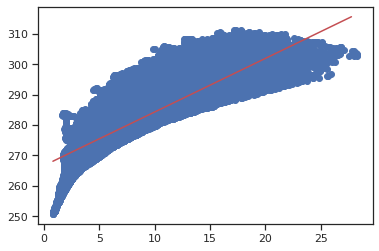

In [20]:
P = dflineal3["P"].to_numpy()
T = dflineal3["T"].to_numpy()
P =P.reshape(-1,1)
red = LinearRegression().fit(P, T)
print(f"El intercepto es {red.intercept_} y el coeficiente es {red.coef_}")
plt.scatter(P,T)
xmax = P.max()
xmin = P.min()
x = np.arange(xmin,xmax,1)
ec = 266.7 + 1.76*x
plt.plot(x,ec,"r")
plt.show

# Clasificación

En este problema de clasificación, se construye un algoritmo que pueda clasificar asteroides según su tamaño, velocidad o masa, y pueda predecir si los mismos serán o no peligrosos para el planeta.

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [22]:
df = pd.read_csv("NASA.csv")

In [24]:
#Borramos el ID, el nombre y el diámetro min, que con el max es suficiente
df = df.drop(columns = ["id", "name","est_diameter_min" ])

In [25]:
df["orbiting_body"].unique()

array(['Earth'], dtype=object)

In [26]:
df["sentry_object"].unique()

array([False])

In [27]:
#Sentry Object y Orbiting body
df = df.drop(columns = ["orbiting_body", "sentry_object" ])

In [28]:
corr = df.corr()
print(corr['hazardous'])

est_diameter_max      0.183363
relative_velocity     0.191185
miss_distance         0.042302
absolute_magnitude   -0.365267
hazardous             1.000000
Name: hazardous, dtype: float64


Aunque la correlación sea débil, vamos a tomar las variables de magnitud absoluta, la velocidad relativa, y el diámetro máximo.

In [29]:
df.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.594347,73588.726663,6.143813e+07,20.00,True
2,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.570217,42737.733765,4.627557e+07,20.09,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_max    90836 non-null  float64
 1   relative_velocity   90836 non-null  float64
 2   miss_distance       90836 non-null  float64
 3   absolute_magnitude  90836 non-null  float64
 4   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(4)
memory usage: 2.9 MB


In [31]:
#Cambiamos el valor de nuestra variable categórica de salida
df["hazardous"] = np.where(df["hazardous"] == False, 0, 1)

In [32]:
df.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.594347,73588.726663,6.143813e+07,20.00,1
2,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.570217,42737.733765,4.627557e+07,20.09,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ab43b9cd0>,
      dtype=object)

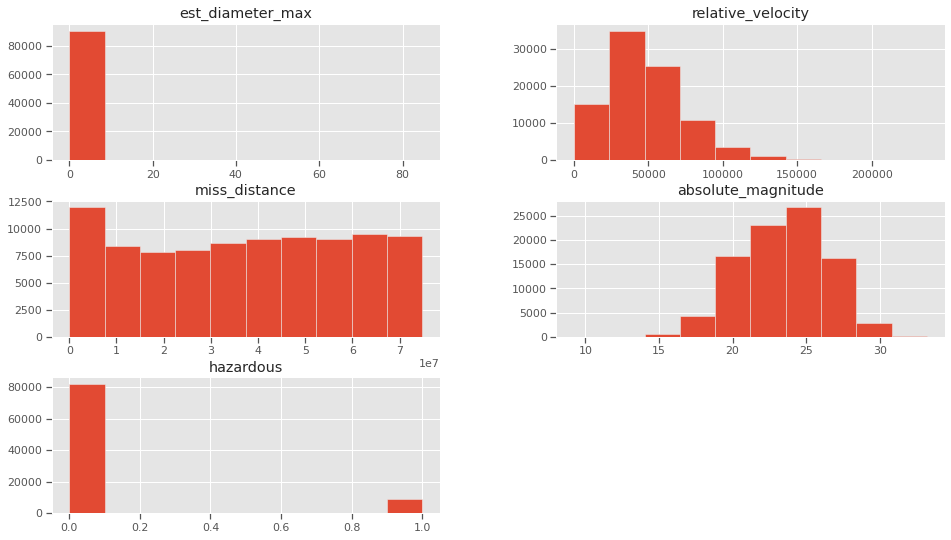

In [35]:
df.hist()

In [36]:
#Separamos en X y en Y.
y = df.loc[:,["hazardous"] ]
x = df.loc[:,["relative_velocity", "absolute_magnitude", "est_diameter_max"]]
x = x / x.max()

In [37]:
y["hazardous"].unique()

array([0, 1])

In [38]:
#Separamos en conjunto de prueba y de entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Árboles de Decisión

In [72]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

In [108]:
#Modelar los datos 
Tree = DecisionTreeClassifier(max_depth=5,
                                criterion='gini',
                                random_state=123)

In [109]:
Tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [110]:
y_predtrain=Tree.predict(x_train)

In [111]:
#Matriz de confusión en entrenamiento
matriz = confusion_matrix(y_train, y_predtrain)
print(matriz)

[[65578     1]
 [ 7076    13]]


In [112]:
accuracyEnt = accuracy_score(y_true= y_train,
                             y_pred=Tree.predict(x_train))
print(f"El desempeño en entrenamiento es:{accuracyEnt}")

El desempeño en entrenamiento es:0.9026118786811251


In [113]:
##Desempeño en prueba 
predicciones = Tree.predict(x_test)
#Matriz de confusión en prueba 
print('Matriz de confusión')
print('----------------------------------------')
confusion_matrix(y_true = y_test,
                 y_pred=predicciones)

Matriz de confusión
----------------------------------------


array([[16416,     1],
       [ 1749,     2]])

In [114]:
accuracyEntP = accuracy_score(y_true= y_test,
                             y_pred=Tree.predict(x_test))
print(f"El desempeño en prueba es:{accuracyEntP}")

El desempeño en prueba es:0.9036767943637164


Profundidad del arbol: 5
Número de nodos terminales: 29


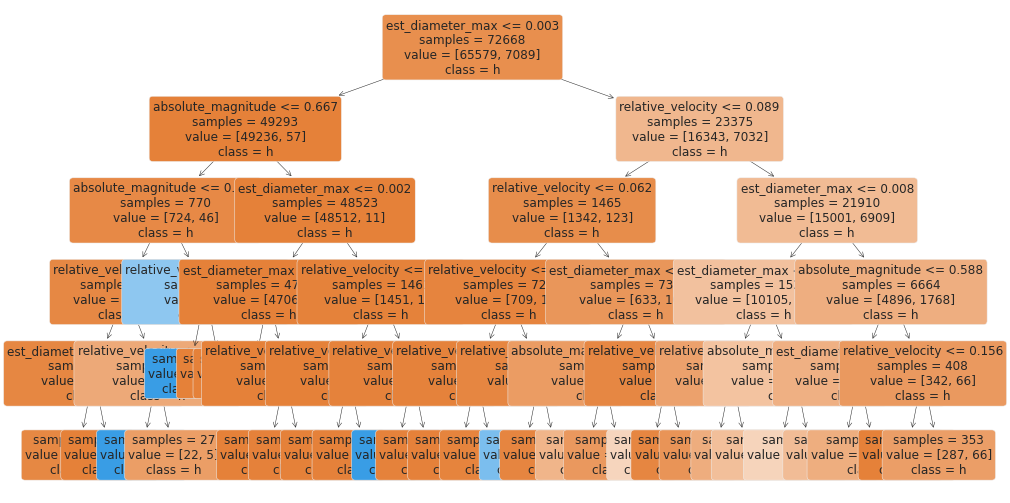

In [115]:

labels=x.columns
fig,ax=plt.subplots(figsize=(16,9))
print(f"Profundidad del arbol: {Tree.get_depth()}")
print(f"Número de nodos terminales: {Tree.get_n_leaves()}")

plot = plot_tree(decision_tree = Tree,
                feature_names = labels.tolist(),
                class_names='hazardous',
                filled=True,rounded=True, 
                impurity=False,
                fontsize=12,
                ax=ax)


## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
out=[]
for i in range(2,20):
  w=KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p=2)
  w.fit(x_train, y_train)
  y_predejem = w.predict(x_test)
  out.append(1-precision_score(y_test, y_predejem,average='micro'))

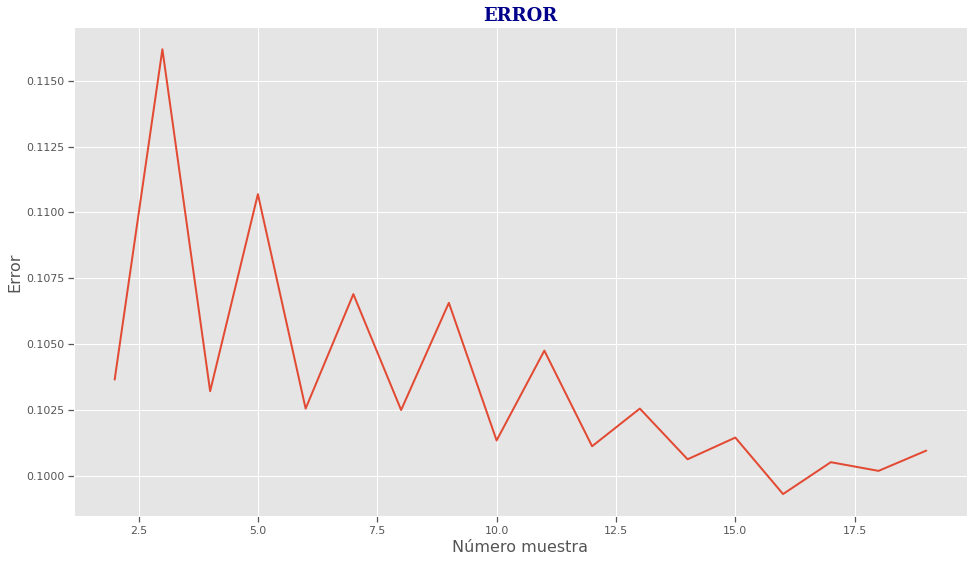

In [55]:
fig, ax = plt.subplots()
ax.plot(list(range(2,20)), out, linewidth=2.0)
plt.xlabel("Número muestra", size = 16,)
plt.ylabel("Error", size = 16)

plt.title("ERROR", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

El número de vecinos que minimiza el error es 18

In [56]:
KNN = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p=2)

In [ ]:
KNN.fit(x_train, y_train)

In [64]:
y_pred = KNN.predict(x_train)

In [65]:
matriz = confusion_matrix(y_train, y_pred)
print(matriz)

[[65012   567]
 [ 6186   903]]


In [66]:
accuracyEnt = accuracy_score(y_true= y_train,
                             y_pred=KNN.predict(x_train))
print(f"El desempeño en entrenamiento es:{accuracyEnt}")

El desempeño en entrenamiento es:0.9070705124676611


In [68]:
precision = precision_score(y_train, y_pred,average='micro')
print(precision)

0.9070705124676611


In [69]:
##Desempeño en prueba 
predicciones = KNN.predict(x_test)
#Matriz de confusión en prueba 
print('Matriz de confusión')
print('----------------------------------------')
confusion_matrix(y_true = y_test,
                 y_pred=predicciones)

Matriz de confusión
----------------------------------------


array([[16207,   210],
       [ 1594,   157]])

In [70]:
accuracyEntP = accuracy_score(y_true= y_test,
                             y_pred=KNN.predict(x_test))
print(f"El desempeño en prueba es:{accuracyEntP}")

El desempeño en prueba es:0.9007045354469396


In [71]:
precisionP = precision_score(y_test, predicciones,average='micro')
print(precisionP)

0.9007045354469396
